In [1]:
import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

In [2]:
# Data preprocessing
file = open(r"Datasets/compas-scores.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

compas_ids = [int(id[x]) for x in range(len(id))]
recid_races = [race[x-1] for x in compas_ids]
recid_scores = [score_text[x-1] for x in compas_ids]

Null hypothesis (proposed distribution): [0.10694137846455727, 0.2229580573951435, 0.6701005641402993]

Proposed distribution rejected at alpha = 0.05. Kardis = 8.9847338529443e-392.
Any plausible distribution must boost probability over the given distribution by 5.56499511486531e+389, and will therefore have a minimum probability of 2.26927115142469e-10.
Closest plausible distribution: [0.25424318263023543, 0.2883369186612183, 0.4574198987085463]


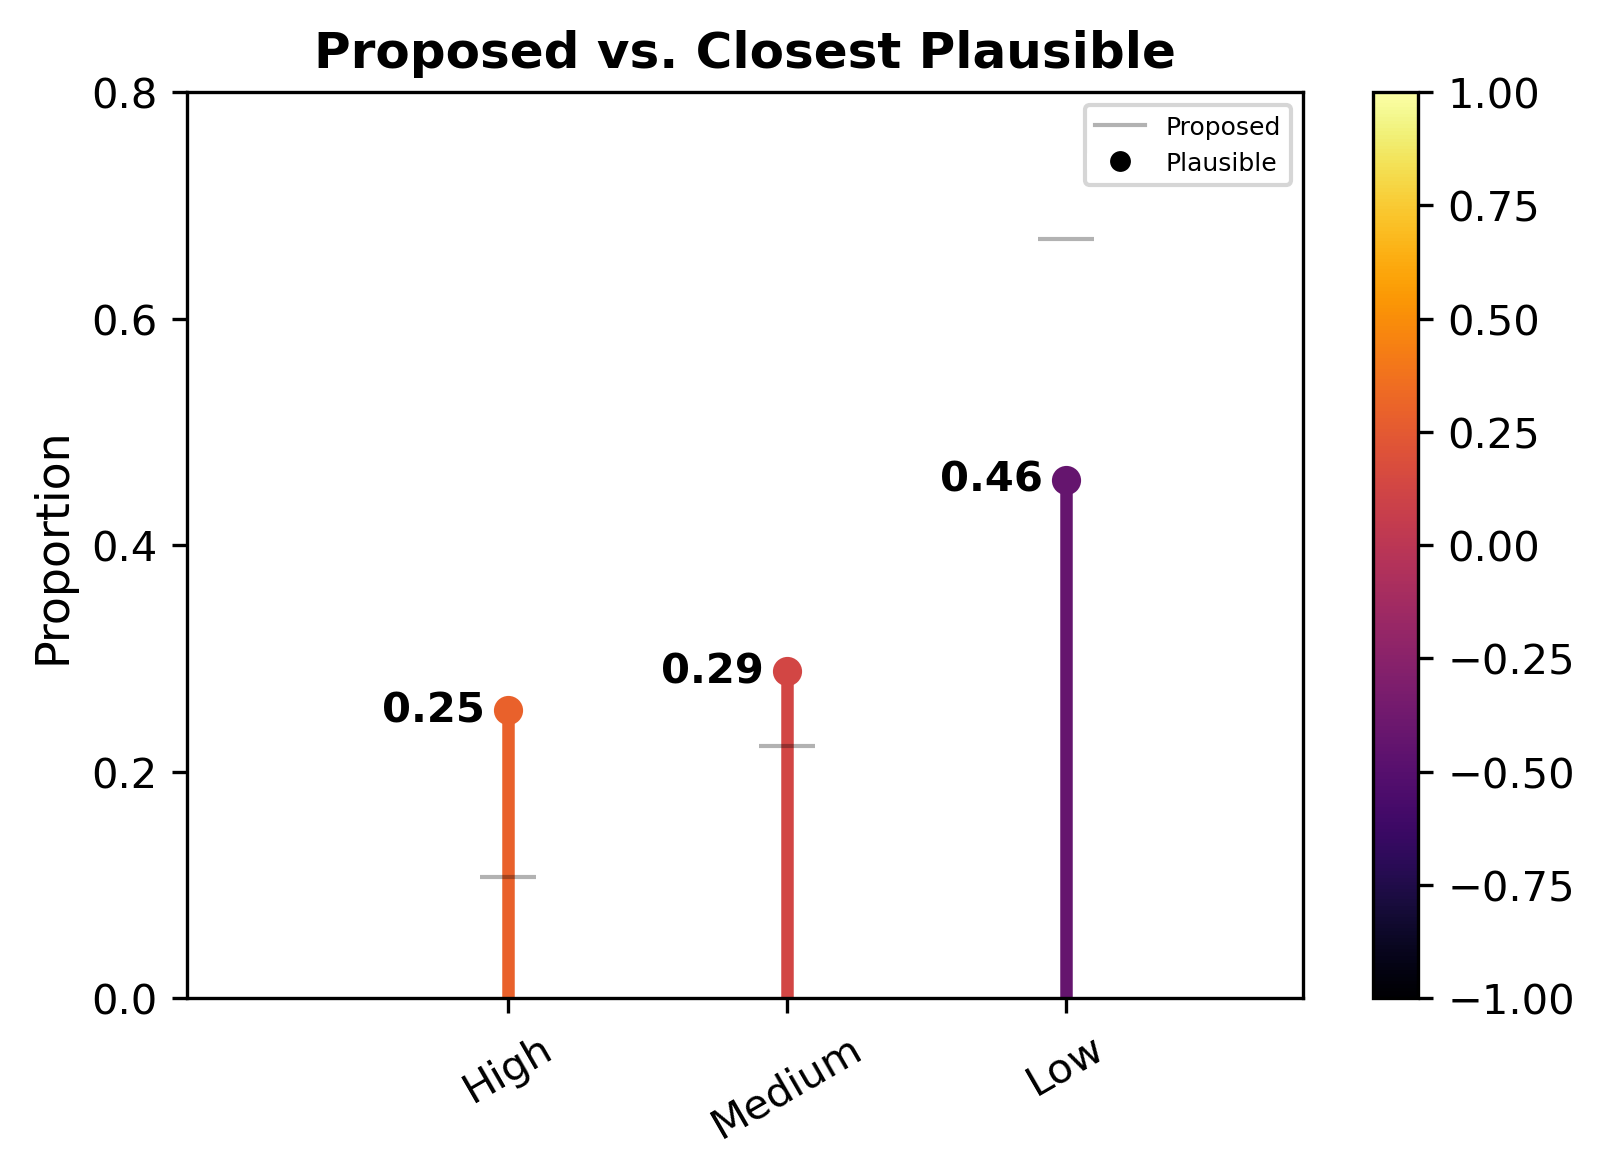

In [3]:
# African-American vs. White Distribution Experiment
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(recid_races,recid_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")
q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_recid_white_dist.pdf")

Null hypothesis (proposed distribution): [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

Proposed distribution rejected at alpha = 0.05. Kardis = 2.46946674239097e-44.
Any plausible distribution must boost probability over the given distribution by 2.02472862426928e+42, and will therefore have a minimum probability of 1.77230216511742e-10.
Closest plausible distribution: [0.2985171991971746, 0.308035947252341, 0.3934468535504843]


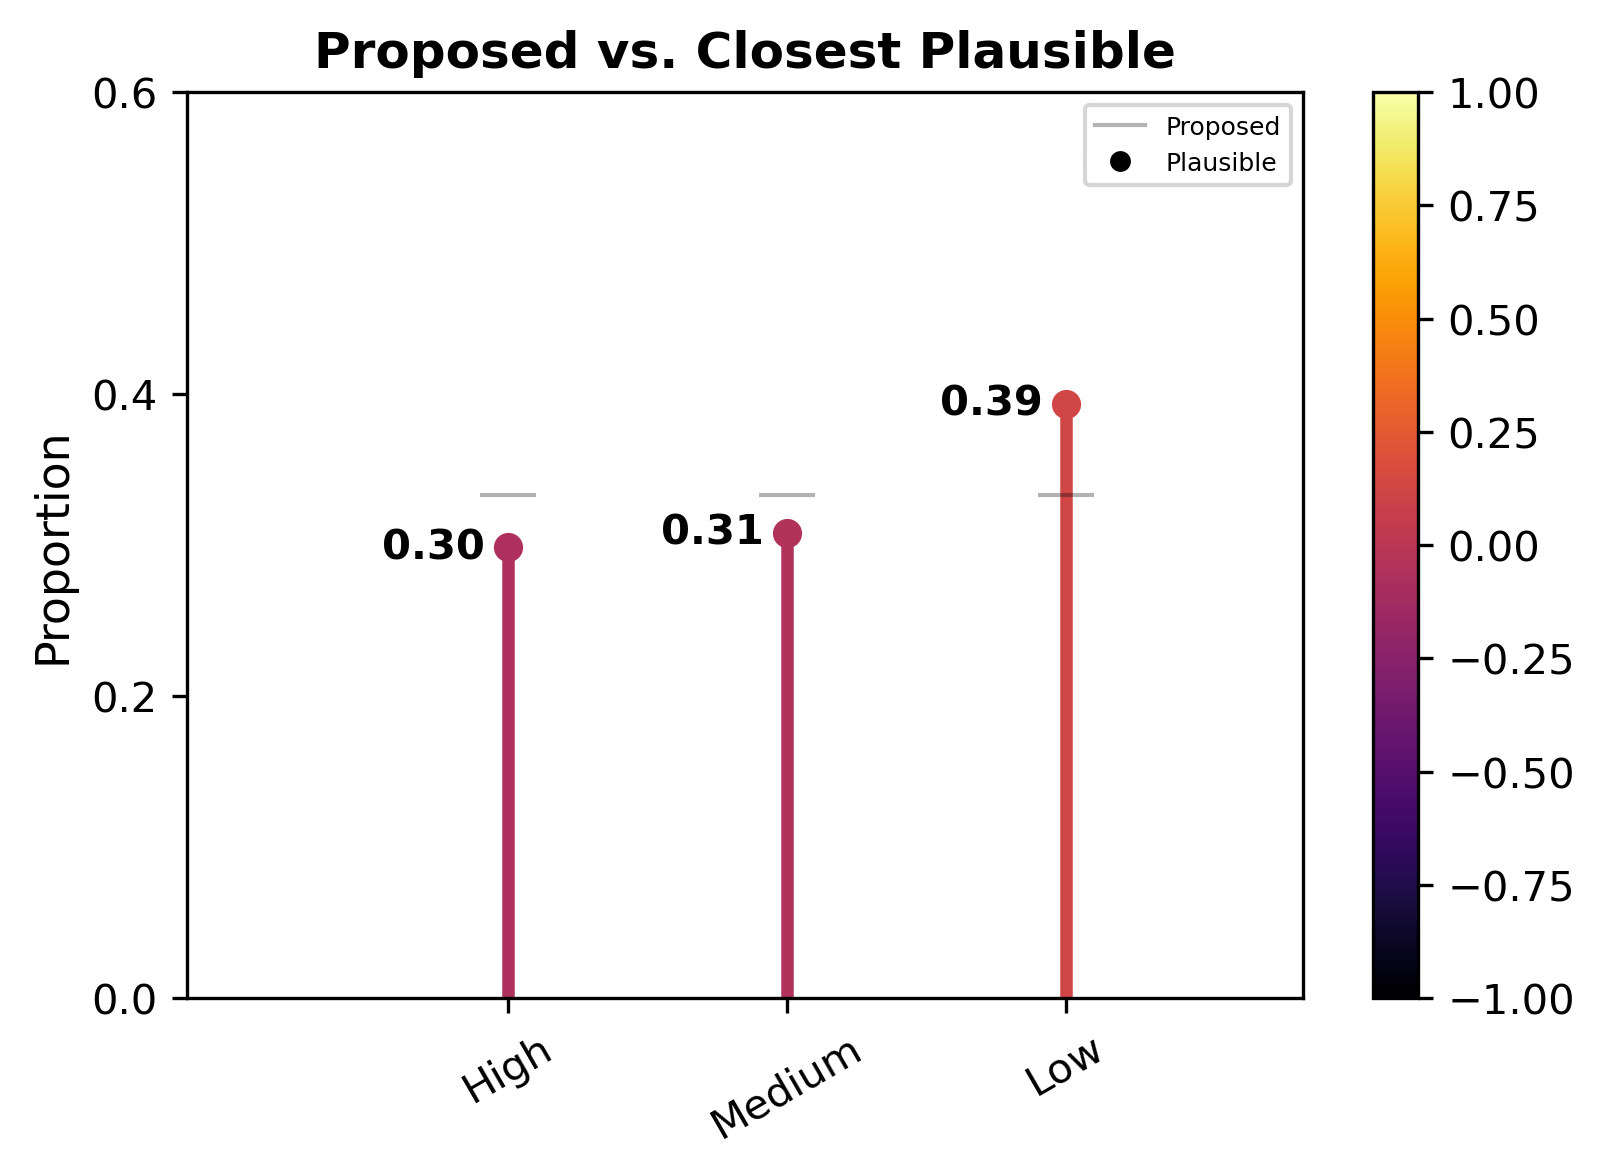

In [4]:
# African-American vs. Uniform Distribution Experiment
print("Null hypothesis (proposed distribution): " + str(3*[1/3]) + "\n")
q_uni = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')])[4]
graph_distributions(q_uni,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=3*[1/3], filename=r"Results/compas_AA_recid_uniform_dist.pdf")